In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
trainData=pd.read_csv('train.csv')
testData = pd.read_csv("test.csv")


In [4]:
trainData.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
testData.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
trainData.shape

(3000, 23)

In [7]:
testData.shape

(4398, 22)

In [8]:
trainData.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [9]:
testData.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [10]:
trainData.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [11]:
testData.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

#### converting the features in Json format to nominal format

In [12]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

## Dropping belongs_to_collection as most of it contains null

In [13]:
trainData.drop(['belongs_to_collection'], axis=1, inplace=True)
testData.drop(['belongs_to_collection'], axis=1, inplace=True)

##  budget

(array([1.49e+03, 3.96e+02, 2.11e+02, 2.20e+02, 9.40e+01, 1.28e+02,
        7.30e+01, 7.30e+01, 4.00e+01, 4.90e+01, 3.30e+01, 3.80e+01,
        1.00e+01, 3.10e+01, 1.10e+01, 1.40e+01, 7.00e+00, 1.40e+01,
        3.00e+00, 1.70e+01, 1.00e+00, 7.00e+00, 3.00e+00, 7.00e+00,
        2.00e+00, 5.00e+00, 7.00e+00, 2.00e+00, 1.00e+00, 2.00e+00,
        0.00e+00, 0.00e+00, 5.00e+00, 0.00e+00, 2.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00]),
 array([0.000e+00, 7.600e+06, 1.520e+07, 2.280e+07, 3.040e+07, 3.800e+07,
        4.560e+07, 5.320e+07, 6.080e+07, 6.840e+07, 7.600e+07, 8.360e+07,
        9.120e+07, 9.880e+07, 1.064e+08, 1.140e+08, 1.216e+08, 1.292e+08,
        1.368e+08, 1.444e+08, 1.520e+08, 1.596e+08, 1.672e+08, 1.748e+08,
        1.824e+08, 1.900e+08, 1.976e+08, 2.052e+08, 2.128e+08, 2.204e+08,
        2.280e+08, 2.356e+08, 2.432e+08, 2.508e+08, 2.58

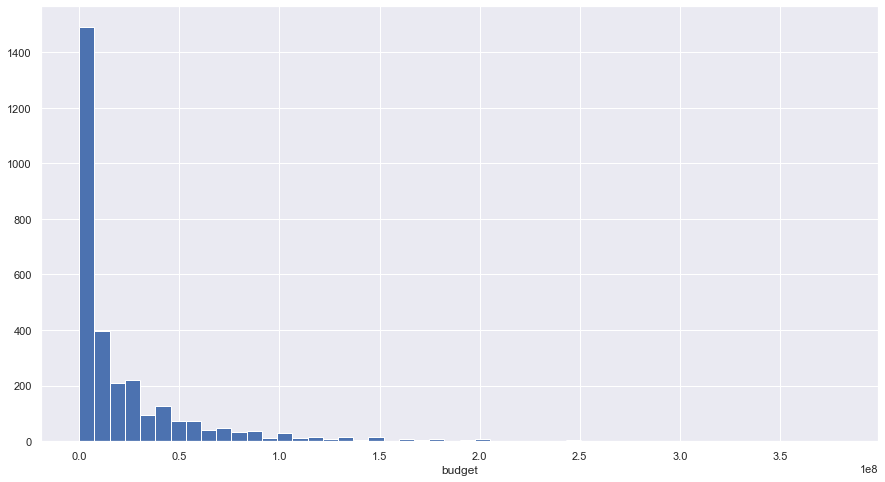

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.xlabel( 'budget')
plt.hist(trainData['budget'],bins = 50)

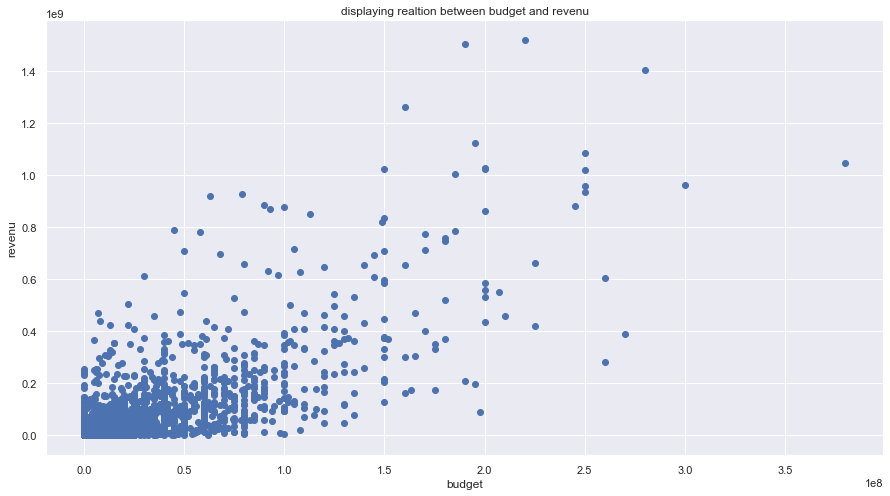

In [15]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'budget')
plt.ylabel('revenu')
plt.scatter(x=trainData['budget'], y=trainData['revenue'])

In [16]:
print( len(trainData[trainData['budget'] < 10000] ) )

835


##  solve column budget because contain many movies have low budget 

In [17]:
trainData = trainData[trainData['budget'] >= 100000]


In [18]:
MEAN = trainData['budget'].mean()

In [19]:
trainData['budget']= trainData['budget'].apply(lambda x : x+MEAN if x<100000  else x)

## using log transform without removing low budgets to have better distrbution

In [20]:
trainData['log_budget'] = np.log1p(trainData['budget'])
testData['log_budget'] = np.log1p(testData['budget'])

## using log Transform after removing budgts less than 10k$

(array([ 16.,   7.,  15.,  34.,  25.,  47.,  55.,  89., 127., 152., 154.,
        239., 264., 268., 211., 201., 143.,  64.,  34.,   6.]),
 array([11.51293546, 11.92507278, 12.3372101 , 12.74934742, 13.16148473,
        13.57362205, 13.98575937, 14.39789669, 14.810034  , 15.22217132,
        15.63430864, 16.04644596, 16.45858327, 16.87072059, 17.28285791,
        17.69499523, 18.10713254, 18.51926986, 18.93140718, 19.3435445 ,
        19.75568181]),
 <BarContainer object of 20 artists>)

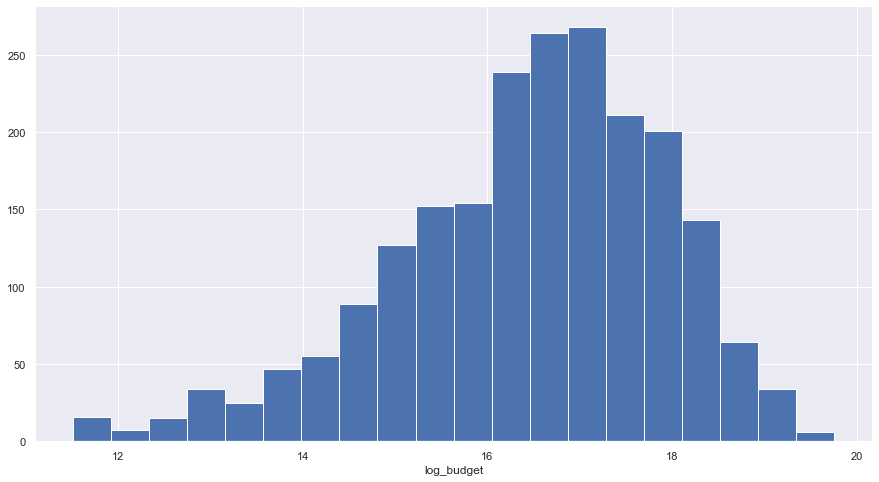

In [21]:
plt.xlabel( 'log_budget')
plt.hist(trainData['log_budget'],bins = 20)

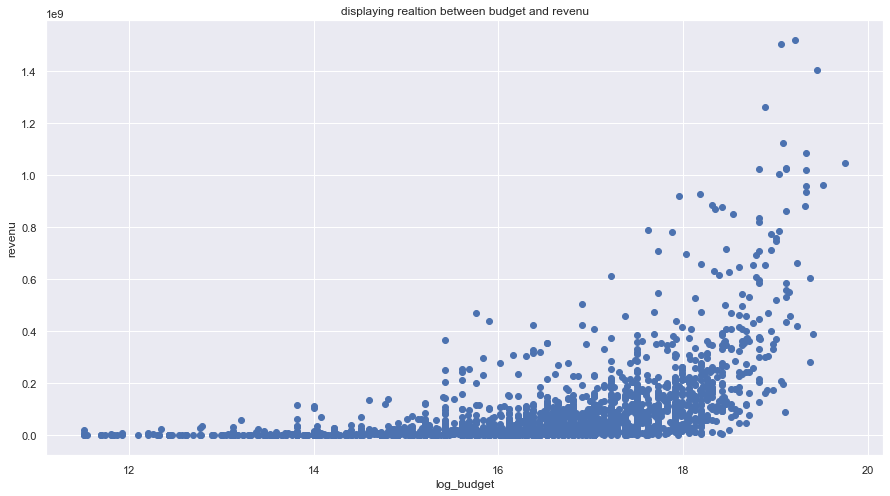

In [22]:
plt.title('displaying realtion between budget and revenu')
plt.xlabel( 'log_budget')
plt.ylabel('revenu')
plt.scatter(x=trainData['log_budget'], y=trainData['revenue'])

In [23]:
print( len(trainData[trainData['budget'] < 50000] ) )

0


In [24]:
print(len(trainData[trainData['budget'] < 10000]))

0


In [25]:
trainData['budget'].describe()

count    2.151000e+03
mean     3.142419e+07
std      4.040687e+07
min      1.000000e+05
25%      6.000000e+06
50%      1.700000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

# genres

In [26]:
j = 0
trainData['genre_Count'] = 0
for i in trainData['genres']:
    d = get_dict(i)
    if d != {}:
        
        trainData['genre_Count'][j] = len(d)
    else:
        trainData['genre_Count'][j] = 0 
    j += 1

j = 0
testData['genre_Count'] = 0
for i in testData['genres']:
    d = get_dict(i)
    if d != {}:
        
        testData['genre_Count'][j] = len(d)
    else:
        testData['genre_Count'][j] = 0 
    j += 1
trainData.drop(['genres'], axis=1, inplace=True)
testData.drop(['genres'], axis=1, inplace=True)
trainData.head()


C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\230666337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['genre_Count'

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,log_budget,genre_Count
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,1
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,4
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,1
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2
5,6,8000000,NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,2


# homepage

In [27]:
trainData.drop(['homepage'], axis=1, inplace=True)
testData.drop(['homepage'], axis=1, inplace=True)

# imbd_id

In [28]:
trainData.drop(['imdb_id'], axis=1, inplace=True)
testData.drop(['imdb_id'], axis=1, inplace=True)


# original_language	

In [29]:
for i,e in enumerate(trainData['original_language'][:5]):
    print(i,e)

0 en
1 en
2 en
3 hi
4 en


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='original_language', ylabel='count'>

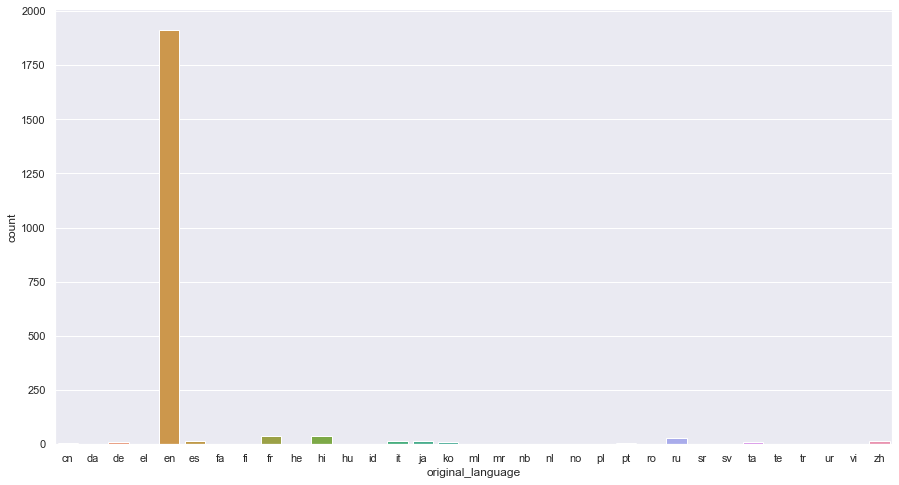

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.countplot(trainData['original_language'].sort_values())



In [31]:

for i in trainData['original_language']:
    if(i=='en'):
        trainData['Has_En']=1
    else:
        trainData['Has_En']=0
for i in testData['original_language']:
    if(i=='en'):
        testData['Has_En']=1
    else:
        testData['Has_En']=0

trainData.head()


,id,budget,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,...,status,tagline,title,Keywords,cast,crew,revenue,log_budget,genre_Count,Has_En
0,1,14000000,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,...,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,1,1
1,2,40000000,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,...,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,4,1
2,3,3300000,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,...,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,1,1
3,4,1200000,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,...,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2,1
5,6,8000000,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,8/6/87,...,Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,2,1


In [32]:
trainData.drop(['original_language'], axis=1, inplace=True)
testData.drop(['original_language'], axis=1, inplace=True)

# original_title & overview

In [33]:
trainData.drop(['original_title','overview'], axis=1, inplace=True)
testData.drop(['original_title','overview'], axis=1, inplace=True)

# popularity	

In [34]:
trainData['popularity'].isnull().sum()

0

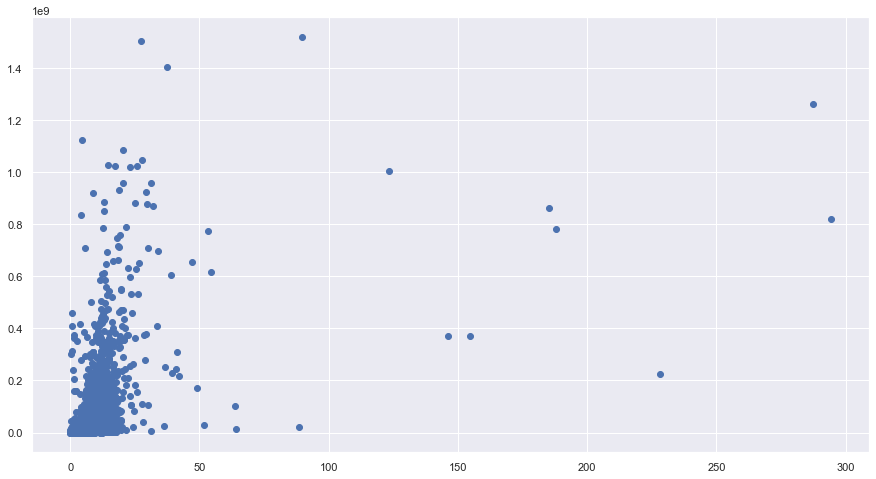

In [35]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.scatter('popularity','revenue',data=trainData)
plt.show()

# poster_path

In [36]:

trainData.drop(['poster_path'], axis=1, inplace=True)
testData.drop(['poster_path'], axis=1, inplace=True)


# production_companies

In [37]:

for i,e in enumerate(trainData["production_companies"][:5]):
    print(i,e)

0 [{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
1 [{'name': 'Walt Disney Pictures', 'id': 2}]
2 [{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
3 nan
4 nan


In [38]:
num_production_companies=pd.DataFrame(columns=['num_production_companies'])
trainData=pd.concat([trainData,num_production_companies],axis=1)
testData=pd.concat([testData,num_production_companies],axis=1)


In [39]:
j=0
for i in trainData["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        trainData['num_production_companies'][j]=len(d)
    else:
        trainData['num_production_companies'][j]=np.NaN
    j+=1
j=0
for i in testData["production_companies"]:
    d=get_dict(i)
    if len(d)!=0:
        testData['num_production_companies'][j]=len(d)
    else:
        testData['num_production_companies'][j]=np.NaN
    j+=1


C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=np.NaN
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['num_production_companies'][j]=len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2612869256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [40]:
trainData.drop(['production_companies'], axis=1, inplace=True)
testData.drop(['production_companies'], axis=1, inplace=True)

In [41]:
trainData["num_production_companies"]

0         3
1         1
2         3
3       NaN
5         2
       ... 
2992    NaN
2993    NaN
2997    NaN
2998    NaN
2999    NaN
Name: num_production_companies, Length: 2151, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_production_companies', ylabel='count'>

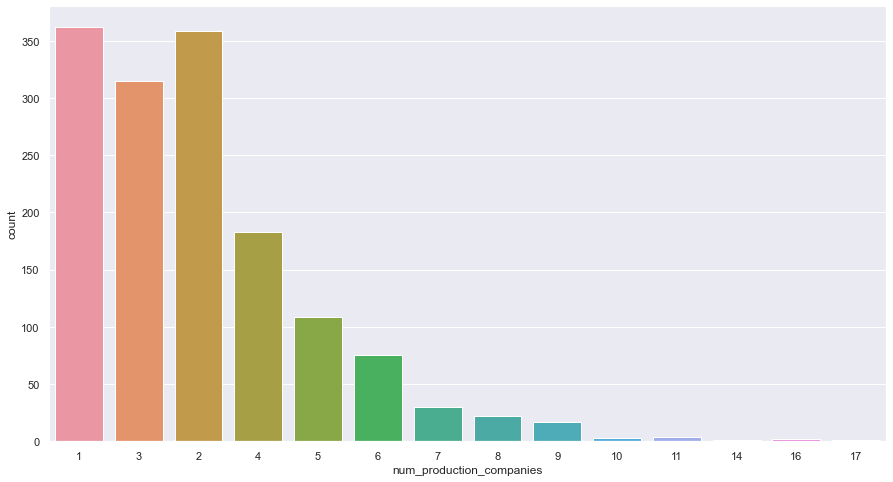

In [42]:

sns.countplot('num_production_companies',data=trainData)


In [43]:
trainData["num_production_companies"].isnull().sum()

668

In [44]:

trainData['num_production_companies']=trainData['num_production_companies'].fillna(trainData['num_production_companies'].mean()).round()
testData['num_production_companies']=testData['num_production_companies'].fillna(testData['num_production_companies'].mean()).round()

# production_countries

In [45]:
for i,e in enumerate(trainData["production_countries"][:5]):
    print(i,e)

0 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
1 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
2 [{'iso_3166_1': 'US', 'name': 'United States of America'}]
3 [{'iso_3166_1': 'IN', 'name': 'India'}]
4 nan


In [46]:
prodect_countries=pd.DataFrame(columns=["production_country"])
trainData=pd.concat([trainData,prodect_countries],axis=1)
testData=pd.concat([testData,prodect_countries],axis=1)


In [47]:
j = 0
for i in trainData['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                trainData['production_country'][j] = 'United States of America'
        else:
            trainData['production_country'][j] = d[0]['name']
    else:
        trainData['production_country'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['production_countries']:
    d = get_dict(i)
    if d != {}:
        if len(d) > 1:
            countires = []
            for k in range(len(d)):
                countires.append(d[k]['name'])
            if 'United States of America' in countires:
                testData['production_country'][j] = 'United States of America'
        else:
            testData['production_country'][j] = d[0]['name']
    else:
        testData['production_country'][j] = np.NaN
    j += 1

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = np.NaN
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = 'United States of America'
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['production_country'][j] = d[0]['name']
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1265860272.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

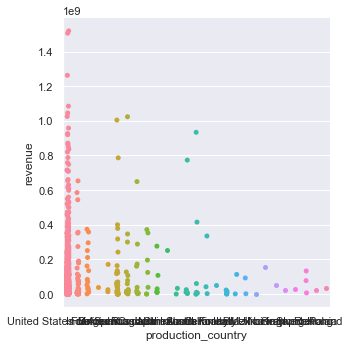

In [48]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.catplot(x='production_country',y='revenue',data=trainData)

In [49]:
is_use_preduction=pd.DataFrame(columns=["is_use_preduction"])
trainData=pd.concat([trainData,is_use_preduction],axis=1)
testData=pd.concat([testData,is_use_preduction],axis=1)

In [50]:
j=0
for i in trainData["production_country"]:
    if i=='United States of America':
        trainData['is_use_preduction'][j]=1
    elif str(i)=='NaN':
        trainData['is_use_preduction'][j]=np.NaN
    else:
        trainData['is_use_preduction'][j]=0
    j+=1
j=0
for i in testData["production_country"]:
    if i=='United States of America':
        testData['is_use_preduction'][j]=1
    elif str(i)=='NaN':
        testData['is_use_preduction'][j]=np.NaN
    else:
        testData['is_use_preduction'][j]=0
    j+=1
    
    

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=0
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_pred

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=0
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_pred

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=0
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_pred

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_pred

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=0
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_preduction'][j]=0
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1949488897.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['is_use_pred

In [51]:
trainData.drop(['production_countries','production_country'], axis=1, inplace=True)
testData.drop(['production_countries','production_country'], axis=1, inplace=True)


In [52]:
trainData['is_use_preduction'].isnull().sum()

618

In [53]:
trainData.head()


,id,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,log_budget,genre_Count,Has_En,num_production_companies,is_use_preduction
0,1,14000000,6.575393,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,1,1,3.0,1
1,2,40000000,8.248895,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,4,1,1.0,1
2,3,3300000,64.299990,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,1,1,3.0,1
3,4,1200000,3.174936,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2,1,3.0,0
5,6,8000000,0.743274,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,2,1,2.0,1


# realse_data

In [54]:
testData.loc[testData['release_date'].isnull()==True, 'release_date']= '5/1/00'
testData[testData["release_date"]== '5/1/00']

,id,budget,popularity,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,log_budget,genre_Count,Has_En,num_production_companies,is_use_preduction
828,3829,0,0.009057,5/1/00,90.0,NaN,NaN,three worlds / two million voices / one genera...,"Jails, Hospitals & Hip-Hop",NaN,[],NaN,0.00000,1,0,3.0,0
1731,4732,103000000,23.186667,5/1/00,155.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Hero Will Rise.,Gladiator,"[{'id': 588, 'name': 'rome'}, {'id': 1394, 'na...","[{'cast_id': 8, 'character': 'Maximus', 'credi...","[{'credit_id': '52fe4217c3a36847f800340d', 'de...",18.45024,3,0,7.0,1


In [55]:
trainData['release_date'] = pd.to_datetime(trainData['release_date'], format='%m/%d/%y')
testData['release_date'] = pd.to_datetime(testData['release_date'], format='%m/%d/%y')
trainData["release_year"] = pd.to_datetime(trainData["release_date"]).dt.year.astype(int)
trainData["release_day"] = pd.to_datetime(trainData["release_date"]).dt.dayofweek.astype(int)
trainData["release_month"] = pd.to_datetime(trainData["release_date"]).dt.month.astype(int)
testData["release_year"] = pd.to_datetime(testData["release_date"]).dt.year.astype(int)
testData["release_day"] = pd.to_datetime(testData["release_date"]).dt.dayofweek.astype(int)
testData["release_month"] = pd.to_datetime(testData["release_date"]).dt.month.astype(int)

# Since this competition was in 2019, there shouldn't be a release that after 2019

In [56]:

trainData['release_year'].max()

2068

In [57]:
# Fixing the dates
def fix_date(x):
    if x > 2019:
        return x - 100
    else:
        return x 

trainData['release_year'] = trainData['release_year'].apply(lambda x: fix_date(x))
testData['release_year'] = testData['release_year'].apply(lambda x: fix_date(x))

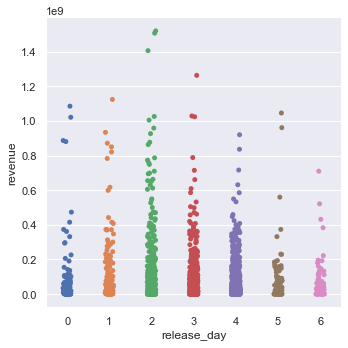

In [58]:
sns.catplot(x='release_day',y='revenue',data=trainData)


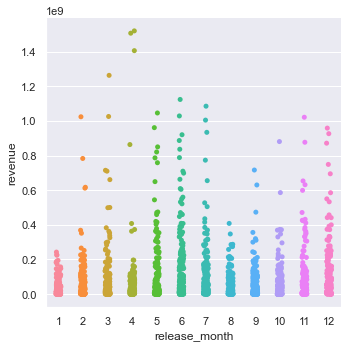

In [59]:
sns.catplot(x='release_month',y='revenue',data=trainData)


(array([  6.,  16.,  15.,  29.,  44.,  60., 189., 306., 660., 826.]),
 array([1921. , 1930.6, 1940.2, 1949.8, 1959.4, 1969. , 1978.6, 1988.2,
        1997.8, 2007.4, 2017. ]),
 <BarContainer object of 10 artists>)

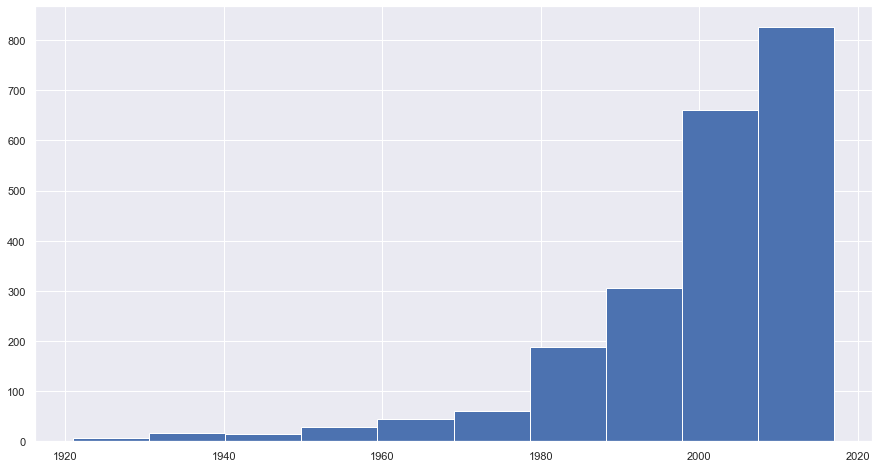

In [60]:
plt.hist('release_year',data=trainData)

# runtime 

In [61]:
for i,e in enumerate(trainData['runtime'][:5]):
    print(i,e)

0 93.0
1 113.0
2 105.0
3 122.0
4 83.0


In [62]:
trainData['runtime'].isnull().sum()

1

In [63]:
trainData['runtime']=trainData['runtime'].fillna(trainData['runtime'].mean()).round()
testData['runtime']=testData['runtime'].fillna(testData['runtime'].mean()).round()
trainData['runtime'].isnull().sum()

0

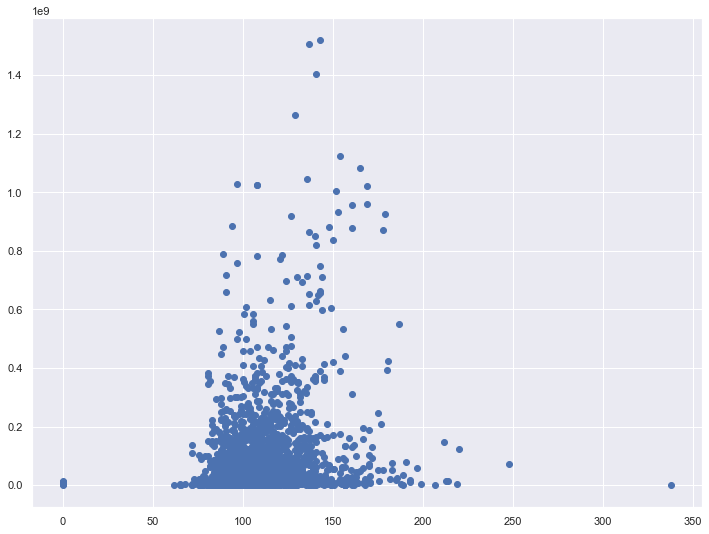

In [64]:
plt.subplots(figsize=(12, 9))
plt.scatter('runtime','revenue',data=trainData)

# spoken_languages

In [65]:
for i,e in enumerate(trainData['spoken_languages'][:5]):
    print(i,e)

0 [{'iso_639_1': 'en', 'name': 'English'}]
1 [{'iso_639_1': 'en', 'name': 'English'}]
2 [{'iso_639_1': 'en', 'name': 'English'}]
3 [{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
4 [{'iso_639_1': 'en', 'name': 'English'}]


In [66]:
number_of_spoken_languages = pd.DataFrame(columns=['number_of_spoken_languages'])
trainData = pd.concat([trainData, number_of_spoken_languages], axis=1)
testData = pd.concat([testData, number_of_spoken_languages], axis=1)

In [67]:
j = 0
for i in trainData['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        trainData['number_of_spoken_languages'][j] = len(d)
    else:
        trainData['number_of_spoken_languages'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['spoken_languages']:
    d = get_dict(i)
    if d != {}:
        testData['number_of_spoken_languages'][j] = len(d)
    else:
        testData['number_of_spoken_languages'][j] = np.NaN
    j += 1

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['number_of_spoken_languages'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\3689744017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

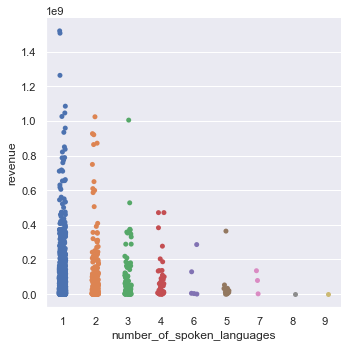

In [68]:
sns.catplot(x='number_of_spoken_languages', y='revenue', data=trainData)

In [69]:
trainData["number_of_spoken_languages"].isnull().sum()

621

In [70]:
trainData['number_of_spoken_languages']=trainData['number_of_spoken_languages'].fillna(trainData['number_of_spoken_languages'].mean()).round()
testData['number_of_spoken_languages']=testData['number_of_spoken_languages'].fillna(testData['number_of_spoken_languages'].mean()).round()

In [71]:
trainData.drop(['spoken_languages'], axis=1, inplace=True)
testData.drop(['spoken_languages'], axis=1, inplace=True)

In [72]:
trainData.head()

,id,budget,popularity,release_date,runtime,status,tagline,title,Keywords,cast,...,revenue,log_budget,genre_Count,Has_En,num_production_companies,is_use_preduction,release_year,release_day,release_month,number_of_spoken_languages
0,1,14000000,6.575393,2015-02-20,93.0,Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...",...,12314651,16.454568,1,1,3.0,1,2015,4,2,1.0
1,2,40000000,8.248895,2004-08-06,113.0,Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...",...,95149435,17.504390,4,1,1.0,1,2004,4,8,1.0
2,3,3300000,64.299990,2014-10-10,105.0,Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...",...,13092000,15.009433,1,1,3.0,1,2014,4,10,1.0
3,4,1200000,3.174936,2012-03-09,122.0,Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...",...,16000000,13.997833,2,1,3.0,0,2012,4,3,2.0
5,6,8000000,0.743274,1987-08-06,83.0,Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...",...,3261638,15.894952,2,1,2.0,1,1987,3,8,1.0


# status

In [73]:

trainData['status'].value_counts()

testData['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

In [74]:
Status=pd.DataFrame(columns=["Status"])
trainData=pd.concat([trainData,Status],axis=1)
testData=pd.concat([testData,Status],axis=1)

In [75]:
j=0
for i in trainData["status"]:
    if i=='Released':
        trainData['Status'][j]=1
    elif str(i)=='NaN':
        trainData['Status'][j]=np.NaN
    else:
        trainData['Status'][j]=0
    j+=1
j=0
for i in testData["status"]:
    if i=='Released':
        testData['Status'][j]=1
    elif str(i)=='NaN':
        testData['Status'][j]=np.NaN
    else:
        testData['Status'][j]=0
    j+=1
    

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\Ap

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\Ap

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\Ap

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\Ap

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\1695507325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['Status'][j]=1
C:\Users\Adithya\Ap

### This feature is not useful most of them are already released 

In [76]:
trainData.drop(['status'], axis=1, inplace=True)
testData.drop(['status'], axis=1, inplace=True)


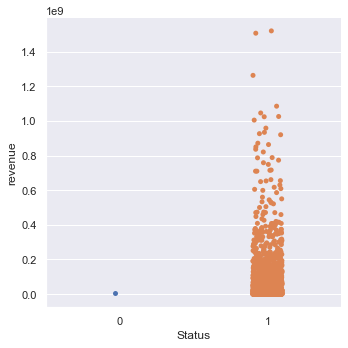

In [77]:
sns.catplot(x="Status",y="revenue",data=trainData)

In [78]:
trainData.drop(['Status'], axis=1, inplace=True)
testData.drop(['Status'], axis=1, inplace=True)

trainData.head()

,id,budget,popularity,release_date,runtime,tagline,title,Keywords,cast,crew,revenue,log_budget,genre_Count,Has_En,num_production_companies,is_use_preduction,release_year,release_day,release_month,number_of_spoken_languages
0,1,14000000,6.575393,2015-02-20,93.0,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,16.454568,1,1,3.0,1,2015,4,2,1.0
1,2,40000000,8.248895,2004-08-06,113.0,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,17.504390,4,1,1.0,1,2004,4,8,1.0
2,3,3300000,64.299990,2014-10-10,105.0,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,15.009433,1,1,3.0,1,2014,4,10,1.0
3,4,1200000,3.174936,2012-03-09,122.0,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,13.997833,2,1,3.0,0,2012,4,3,2.0
5,6,8000000,0.743274,1987-08-06,83.0,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,15.894952,2,1,2.0,1,1987,3,8,1.0


## tagline

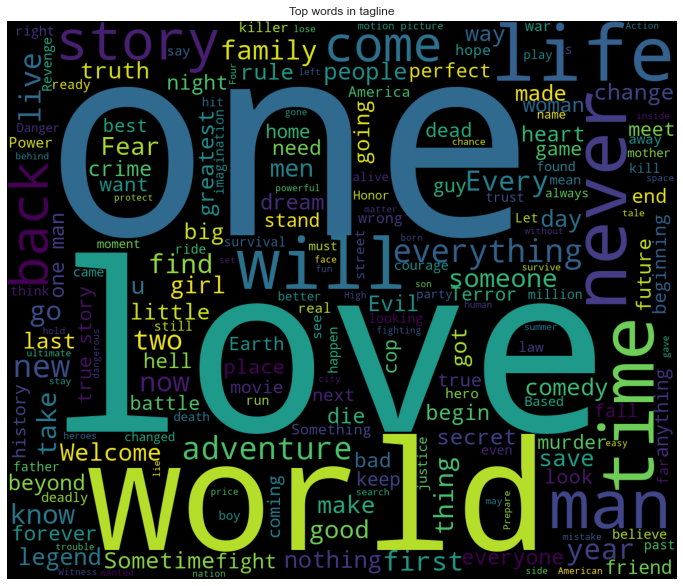

In [79]:
plt.figure(figsize = (12, 12))
text = ' '.join(trainData['tagline'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in tagline')
plt.axis("off")
plt.show()

##  from this figure it's shown most films contains comedy  , drama related words.

## title will be dropped not important

In [80]:
trainData.drop(['title','release_date','tagline'], axis=1, inplace=True)
testData.drop(['title','release_date','tagline'], axis=1, inplace=True)

## keywords

In [81]:
trainData.drop(['Keywords'], axis=1, inplace=True)
testData.drop(['Keywords'], axis=1, inplace=True)

## cast

In [82]:
size_of_cast = pd.DataFrame(columns=['size_of_cast'])
trainData = pd.concat([trainData, size_of_cast], axis=1)
testData = pd.concat([testData, size_of_cast], axis=1)

In [83]:
j = 0
for i in trainData['cast']:
    d = get_dict(i)
    if d != {}:
        trainData['size_of_cast'][j] = len(d)
    else:
        trainData['size_of_cast'][j] = np.NaN
    j += 1
    
j = 0
for i in testData['cast']:
    d = get_dict(i)
    if d != {}:
        testData['size_of_cast'][j] = len(d)
    else:
        testData['size_of_cast'][j] = np.NaN
    j += 1

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of_cast'][j] = len(d)
C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainData['size_of

C:\Users\Adithya\AppData\Local\Temp\ipykernel_27916\2046998917.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testData['size_of_cast'][j] = np.NaN


In [84]:
trainData.drop(['cast'], axis=1, inplace=True)
testData.drop(['cast'], axis=1, inplace=True)

In [85]:
trainData["size_of_cast"].isnull().sum()

627

In [86]:
trainData['size_of_cast']=trainData['size_of_cast'].fillna(trainData['size_of_cast'].mean()).round()
testData['size_of_cast']=testData['size_of_cast'].fillna(testData['size_of_cast'].mean()).round()

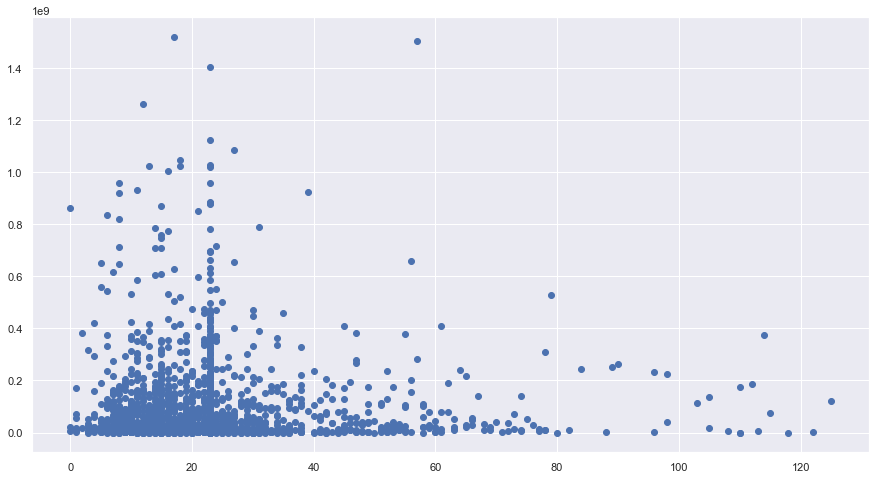

In [87]:
plt.scatter("size_of_cast","revenue",data=trainData)

In [88]:
#crew

In [89]:
trainData.drop(['crew'], axis=1, inplace=True)
testData.drop(['crew'], axis=1, inplace=True)

In [90]:

trainData.head()



,id,budget,popularity,runtime,revenue,log_budget,genre_Count,Has_En,num_production_companies,is_use_preduction,release_year,release_day,release_month,number_of_spoken_languages,size_of_cast
0,1,14000000,6.575393,93.0,12314651,16.454568,1,1,3.0,1,2015,4,2,1.0,24.0
1,2,40000000,8.248895,113.0,95149435,17.504390,4,1,1.0,1,2004,4,8,1.0,20.0
2,3,3300000,64.299990,105.0,13092000,15.009433,1,1,3.0,1,2014,4,10,1.0,51.0
3,4,1200000,3.174936,122.0,16000000,13.997833,2,1,3.0,0,2012,4,3,2.0,7.0
5,6,8000000,0.743274,83.0,3261638,15.894952,2,1,2.0,1,1987,3,8,1.0,14.0


In [91]:

# from sklearn.preprocessing import LabelEncoder
# def Feature_Encoder(trainData,cols):
#     for c in cols:
#         lbl = LabelEncoder()
#         lbl.fit(list(trainData[c].values))
#         trainData[c] = lbl.transform(list(trainData[c].values))
#     return trainData
# cols={'genre_name'}
# trainData=Feature_Encoder(trainData,cols)
# def Feature_Encoder(testData,cols):
#     for c in cols:
#         lbl = LabelEncoder()
#         lbl.fit(list(testData[c].values))
#         testData[c] = lbl.transform(list(testData[c].values))
#     return testData
# cols={'genre_name'}
# testData=Feature_Encoder(testData,cols)

In [92]:
testData.head()

,id,budget,popularity,runtime,log_budget,genre_Count,Has_En,num_production_companies,is_use_preduction,release_year,release_day,release_month,number_of_spoken_languages,size_of_cast
0,3001,0,3.851534,90.0,0.000000,4,0,3.0,1,2007,5,7,2.0,7.0
1,3002,88000,3.559789,65.0,11.385103,2,0,1.0,1,1958,6,5,1.0,10.0
2,3003,0,8.085194,100.0,0.000000,2,0,3.0,1,1997,4,5,1.0,9.0
3,3004,6800000,8.596012,130.0,15.732433,3,0,3.0,0,2010,5,9,3.0,23.0
4,3005,2000000,3.217680,92.0,14.508658,2,0,3.0,1,2005,4,2,1.0,4.0


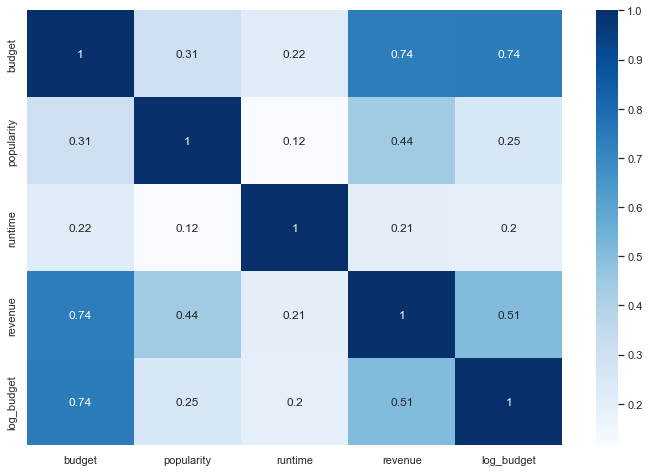

In [93]:
corr =trainData.corr()
top_feature = corr.index[abs(corr['revenue'])>0.2]
#Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = trainData[top_feature].corr()
sns.heatmap(top_corr,cmap='Blues', annot=True)
plt.show()

In [94]:
trainData.head()

,id,budget,popularity,runtime,revenue,log_budget,genre_Count,Has_En,num_production_companies,is_use_preduction,release_year,release_day,release_month,number_of_spoken_languages,size_of_cast
0,1,14000000,6.575393,93.0,12314651,16.454568,1,1,3.0,1,2015,4,2,1.0,24.0
1,2,40000000,8.248895,113.0,95149435,17.504390,4,1,1.0,1,2004,4,8,1.0,20.0
2,3,3300000,64.299990,105.0,13092000,15.009433,1,1,3.0,1,2014,4,10,1.0,51.0
3,4,1200000,3.174936,122.0,16000000,13.997833,2,1,3.0,0,2012,4,3,2.0,7.0
5,6,8000000,0.743274,83.0,3261638,15.894952,2,1,2.0,1,1987,3,8,1.0,14.0


In [95]:
y=trainData.revenue


In [96]:
#train_x,val_x,train_y,val_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=1)

In [97]:
features=['log_budget','popularity',"runtime"]


In [98]:
train_x=trainData[features]


In [99]:
Rf_model=RandomForestRegressor(random_state=1)
Rf_model.fit(train_x,y)
Rf_prediction=Rf_model.predict(train_x)
mean_absolute_error(Rf_prediction,y)

20202943.660097625

In [100]:
r2_score(Rf_prediction,y)

0.9304375285237262

# perdiction using test data

In [101]:
test_id=testData["id"]
test_id.shape
test_x=testData[features]
Rf_predictions=Rf_model.predict(test_x)


In [102]:
submission = pd.DataFrame({'id': test_id, 'revenue':Rf_predictions})
submission = submission[['id', 'revenue']]

submission.to_csv("submission.csv", index=False)